In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from  tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('./data/dataset_sliced.csv')



In [3]:
X = data.iloc[:, 0:17]
y = data.iloc[:, 18]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

y.astype(np.float32)
X.astype(np.float32)

(38818, 17) (38818,) (25879, 17) (25879,)


,chest_ACC_x,chest_ACC_y,chest_ACC_z,Resp,ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.280000,32.130001,78.0,1.0,34.0,182.0,3.0,6.0,0.0
1,0.8520,-0.0666,-0.3826,2.915955,0.159714,-0.750000,-0.078125,0.671875,6.340000,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,1.0
2,0.8300,-0.0102,-0.3502,-1.623535,0.014603,-1.046875,-0.046875,0.843750,7.700000,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
3,0.7630,0.0552,-0.6070,0.416565,-0.307617,-0.859375,-0.390625,0.390625,-120.349998,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
4,0.8894,-0.0520,-0.2520,0.198364,0.604111,-1.015625,-0.078125,0.140625,-7.060000,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,0.7874,-0.0146,-0.5400,1.446533,0.486740,-0.984375,0.156250,0.234375,7.300000,34.029999,79.0,1.0,28.0,183.0,2.0,5.0,1.0
64693,0.8936,-0.1080,0.4138,10.545349,-0.124466,-0.562500,-0.031250,0.718750,117.290001,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,0.0
64694,0.9012,0.0262,-0.1576,-7.260132,-0.138702,-0.375000,-0.203125,0.875000,39.549999,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,1.0
64695,0.8966,0.0104,-0.2252,1.187134,-0.288849,-1.421875,-0.046875,0.171875,-21.280001,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,0.0


In [5]:
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)


In [6]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
import matplotlib.pyplot as plt

model = Sequential() 
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1]))) 
model.add(Dropout(0.5)) 
model.add( LSTM(20,return_sequences=False)) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam')

In [7]:
model.fit(X_train, y_train, epochs=3000, batch_size=128, verbose=1)

Epoch 1/3000
304/304 [==============================] - 5s 10ms/step - loss: 80.9350
Epoch 2/3000
304/304 [==============================] - 3s 10ms/step - loss: 73.6514
Epoch 3/3000
304/304 [==============================] - 3s 10ms/step - loss: 67.1738
Epoch 4/3000
304/304 [==============================] - 3s 10ms/step - loss: 60.7376
Epoch 5/3000
304/304 [==============================] - 3s 10ms/step - loss: 54.2700
Epoch 6/3000
304/304 [==============================] - 3s 10ms/step - loss: 47.9815
Epoch 7/3000
304/304 [==============================] - 3s 10ms/step - loss: 41.9996
Epoch 8/3000
304/304 [==============================] - 3s 10ms/step - loss: 36.7150
Epoch 9/3000
304/304 [==============================] - 3s 10ms/step - loss: 32.3011
Epoch 10/3000
304/304 [==============================] - 3s 10ms/step - loss: 28.9615
Epoch 11/3000
304/304 [==============================] - 3s 10ms/step - loss: 26.6358
Epoch 12/3000
304/304 [==============================] - 3s 10m

In [11]:
# model.save('./.ipynb_checkpoints/LSTM.hdf5')

# model = load_model('./.ipynb_checkpoints/LSTM.hdf5')

In [12]:

S1 = data.loc[data['Subject'] == 'S1']
S2 = data.loc[data['Subject'] == 'S2']
S3 = data.loc[data['Subject'] == 'S3']
S4 = data.loc[data['Subject'] == 'S4']
S5 = data.loc[data['Subject'] == 'S5']
S6 = data.loc[data['Subject'] == 'S6']
S7 = data.loc[data['Subject'] == 'S7']
S8 = data.loc[data['Subject'] == 'S8']
S9 = data.loc[data['Subject'] == 'S9']
S10 = data.loc[data['Subject'] == 'S10']
S11 = data.loc[data['Subject'] == 'S11']
S12 = data.loc[data['Subject'] == 'S12']
S13 = data.loc[data['Subject'] == 'S13']
S14 = data.loc[data['Subject'] == 'S14']
S15 = data.loc[data['Subject'] == 'S15']

S1 = data.loc[data['Subject'] == 'S1']
S1_X = S1.iloc[:, 0:17]
S1_y = S1.iloc[:, 18]
S2 = data.loc[data['Subject'] == 'S2']
S2_X = S2.iloc[:, 0:17]
S2_y = S2.iloc[:, 18]
S3 = data.loc[data['Subject'] == 'S3']
S3_X = S3.iloc[:, 0:17]
S3_y = S3.iloc[:, 18]
S4 = data.loc[data['Subject'] == 'S4']
S4_X = S4.iloc[:, 0:17]
S4_y = S4.iloc[:, 18]
S5 = data.loc[data['Subject'] == 'S5']
S5_X = S5.iloc[:, 0:17]
S5_y = S5.iloc[:, 18]
S6 = data.loc[data['Subject'] == 'S6']
S6_X = S6.iloc[:, 0:17]
S6_y = S6.iloc[:, 18]
S7 = data.loc[data['Subject'] == 'S7']
S7_X = S7.iloc[:, 0:17]
S7_y = S7.iloc[:, 18]
S8 = data.loc[data['Subject'] == 'S8']
S8_X = S8.iloc[:, 0:17]
S8_y = S8.iloc[:, 18]
S9 = data.loc[data['Subject'] == 'S9']
S9_X = S9.iloc[:, 0:17]
S9_y = S9.iloc[:, 18]
S10 = data.loc[data['Subject'] == 'S10']
S10_X = S10.iloc[:, 0:17]
S10_y = S10.iloc[:, 18]
S11 = data.loc[data['Subject'] == 'S11']
S11_X = S11.iloc[:, 0:17]
S11_y = S11.iloc[:, 18]
S12 = data.loc[data['Subject'] == 'S12']
S12_X = S12.iloc[:, 0:17]
S12_y = S12.iloc[:, 18]
S13 = data.loc[data['Subject'] == 'S13']
S13_X = S13.iloc[:, 0:17]
S13_y = S13.iloc[:, 18]
S14 = data.loc[data['Subject'] == 'S14']
S14_X = S14.iloc[:, 0:17]
S14_y = S14.iloc[:, 18]
S15 = data.loc[data['Subject'] == 'S15']
S15_X = S15.iloc[:, 0:17]
S15_y = S15.iloc[:, 18]





In [13]:
model.evaluate(S1_X,S1_y)
model.evaluate(S2_X,S2_y)
model.evaluate(S3_X,S3_y)
model.evaluate(S4_X,S4_y)
model.evaluate(S5_X,S5_y)
model.evaluate(S6_X,S6_y)
model.evaluate(S7_X,S7_y)
model.evaluate(S8_X,S8_y)
model.evaluate(S9_X,S9_y)
model.evaluate(S10_X,S10_y)
model.evaluate(S11_X,S11_y)
model.evaluate(S12_X,S12_y)
model.evaluate(S13_X,S13_y)
model.evaluate(S14_X,S14_y)
model.evaluate(S15_X,S15_y)

124/124 [==============================] - 0s 2ms/step - loss: 5.2686


5.268621921539307

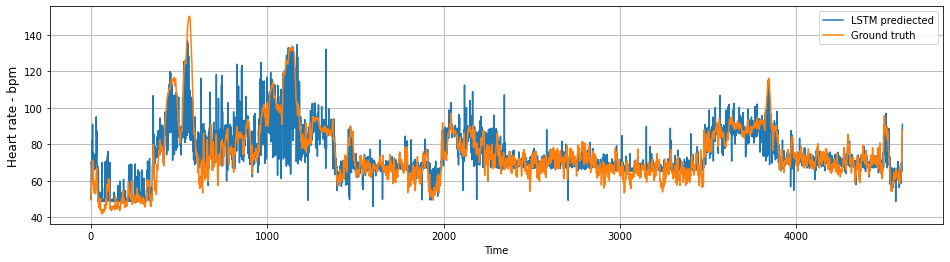

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( model.predict(S1_X), label = 'LSTM prediected')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()
